# PROYECTO FINAL

Authors:

* Javier Domínguez Parras - 100429736
* Juan Tejerina Rodríguez - 100549357

In [2]:
#------- IMPORTS -------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import torch
import seaborn as sns
from IPython.display import display

import nltk

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')

from nltk import download
from nltk import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.corpus import wordnet

from sklearn.feature_extraction.text import TfidfVectorizer

import gensim

import re
from bs4 import BeautifulSoup
%pip install contractions
from contractions import fix
from termcolor import colored

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\javie\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\javie\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\javie\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\javie\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Note: you may need to restart the kernel to use updated packages.


In [3]:
#----------------- LOADING THE DATASHEET -----------------
data = pd.read_json('full_format_recipes.json')

In [4]:
# Seleccionamos únicamente las filas donde 'rating' no es nulo
filtered_data = data.dropna(subset=['rating'])


# Extraemos la columna 'desc' después del filtrado
desc_col = filtered_data['desc']

df = pd.DataFrame(data)

print(f"Filas eliminadas: {len(data) - len(filtered_data)}")


Filas eliminadas: 30


# **Análisis de la variable rating y categories**

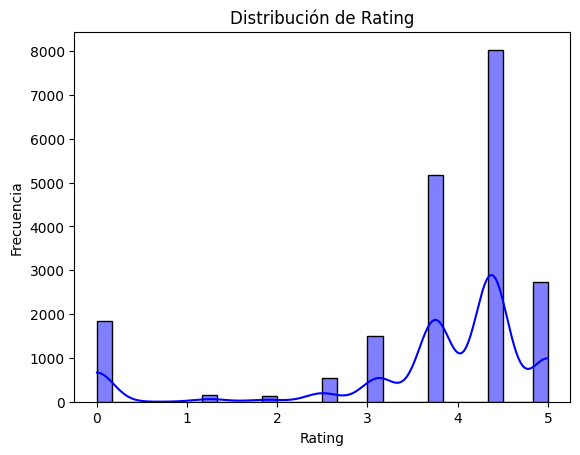

In [5]:
# Ver distribución de la variable rating
sns.histplot(df['rating'], kde=True, bins=30, color='blue')
plt.title('Distribución de Rating')
plt.xlabel('Rating')
plt.ylabel('Frecuencia')
plt.show()

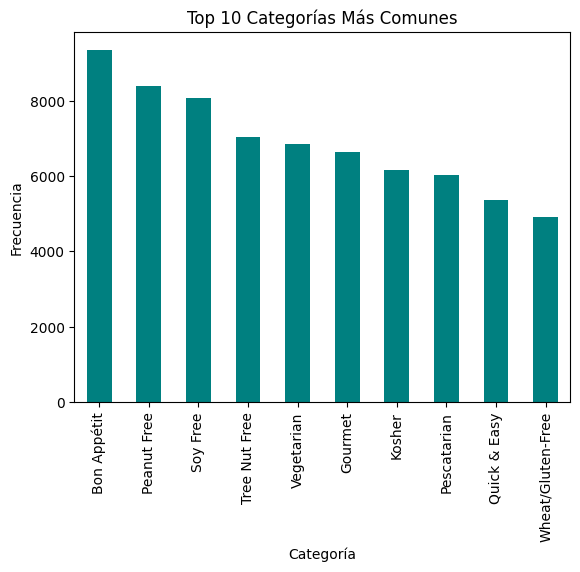

In [6]:
# Explode para descomponer las listas de categorías
df_exploded = df.explode('categories')

# Ver distribución de las categorías más comunes
categories_count = df_exploded['categories'].value_counts()

# Gráfico de las categorías más frecuentes
categories_count.head(10).plot(kind='bar', color='teal')
plt.title('Top 10 Categorías Más Comunes')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
plt.show()

# **Relación entre categories y rating**
Cálculos del rating por categorías del top 10, los peores 10 y el rating promedio por categoría.

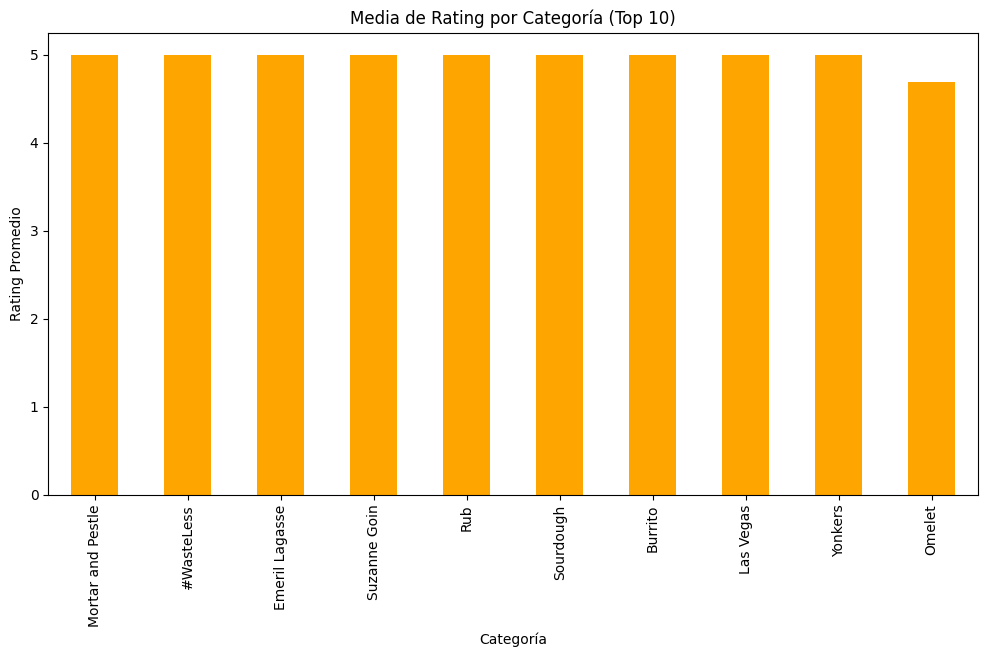

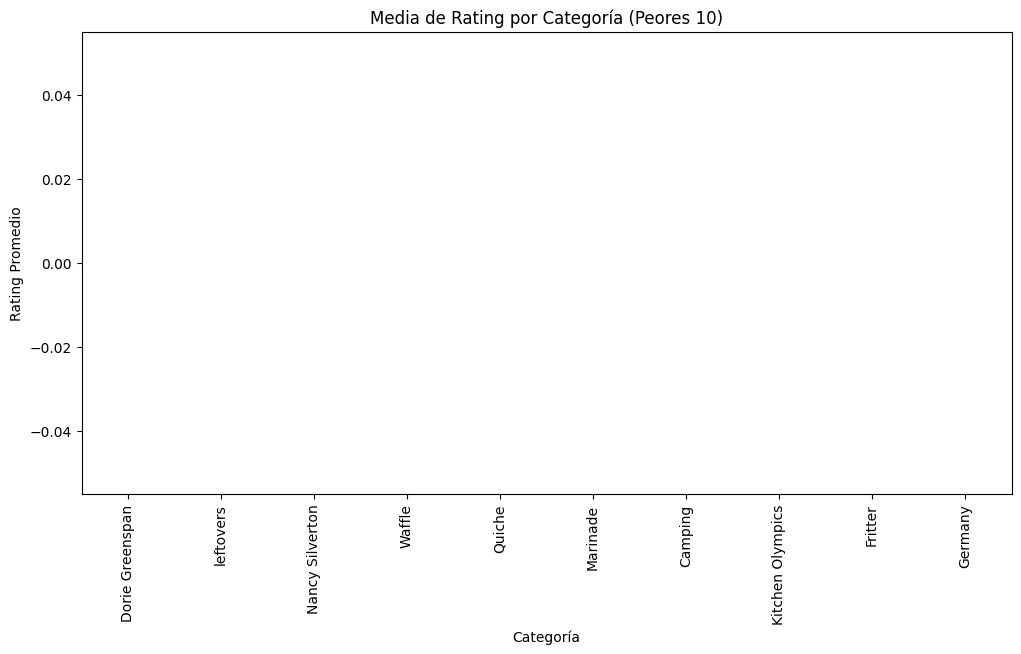

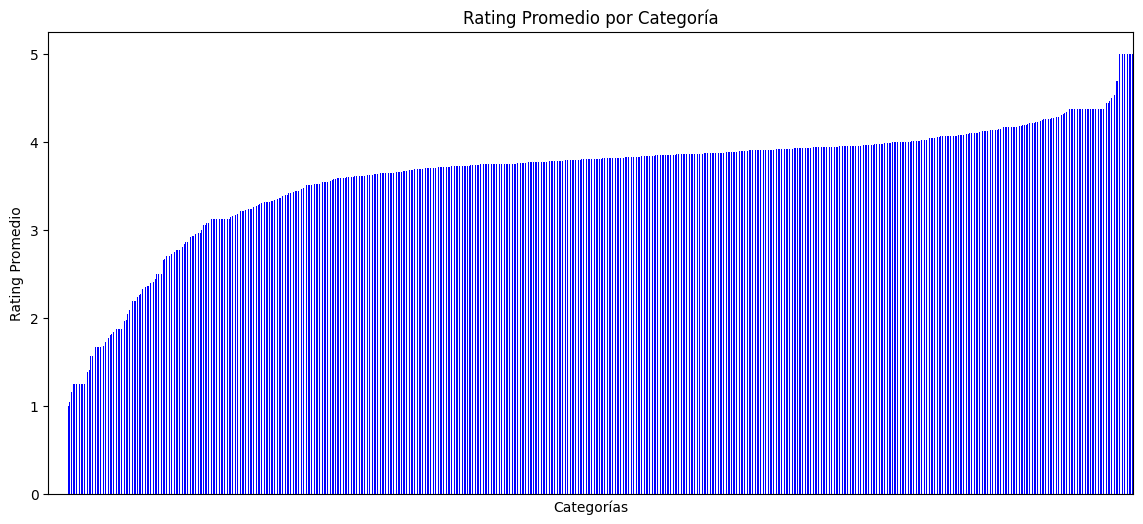

In [7]:
# Calcular la media del rating por categoría
category_ratings = df_exploded.groupby('categories')['rating'].mean()

# Ordenar categorías por el rating promedio
category_ratings_sorted = category_ratings.sort_values(ascending=False)


#********************10 mejores***************************#
# Visualizar las 10 categorías con mejor rating promedio
plt.figure(figsize=(12, 6))
category_ratings_sorted.head(10).plot(kind='bar', color='orange')
plt.title('Media de Rating por Categoría (Top 10)')
plt.xlabel('Categoría')
plt.ylabel('Rating Promedio')
plt.show()

#*********************10 peores****************************#
# Visualizar las 10 peores categoriaas
category_ratings_sorted = category_ratings.sort_values(ascending=True)

plt.figure(figsize=(12, 6))
category_ratings_sorted.head(10).plot(kind='bar', color='orange')
plt.title('Media de Rating por Categoría (Peores 10)')
plt.xlabel('Categoría')
plt.ylabel('Rating Promedio')
plt.show()

#*********************TODAS*********************************#
plt.figure(figsize=(14, 6))
category_ratings_sorted = category_ratings.sort_values(ascending=True)
category_ratings_sorted.reset_index(drop=True).plot(kind='bar', color='blue')

# Personalizar el gráfico
plt.title('Rating Promedio por Categoría')
plt.xlabel('Categorías')
plt.ylabel('Rating Promedio')
plt.xticks([])  # No mostrar etiquetas en el eje X
plt.show()


¿Que sucede aqui? Al representar el top 10 y las peores no se obtiene algo objetivo o algo que pueda demostrar ya que alomejor algunas solo tienen una reseña, lo que se va a realizar es un top 10 o un peores 10 pero con un minimo de 20 reseñas. (esto se hace para hacer una valoracion de categorias que sean algo famosas). También se reaizará un análisis de que rating tienen las categorías más comunes.

Top 10 categorías más comunes y su rating promedio:


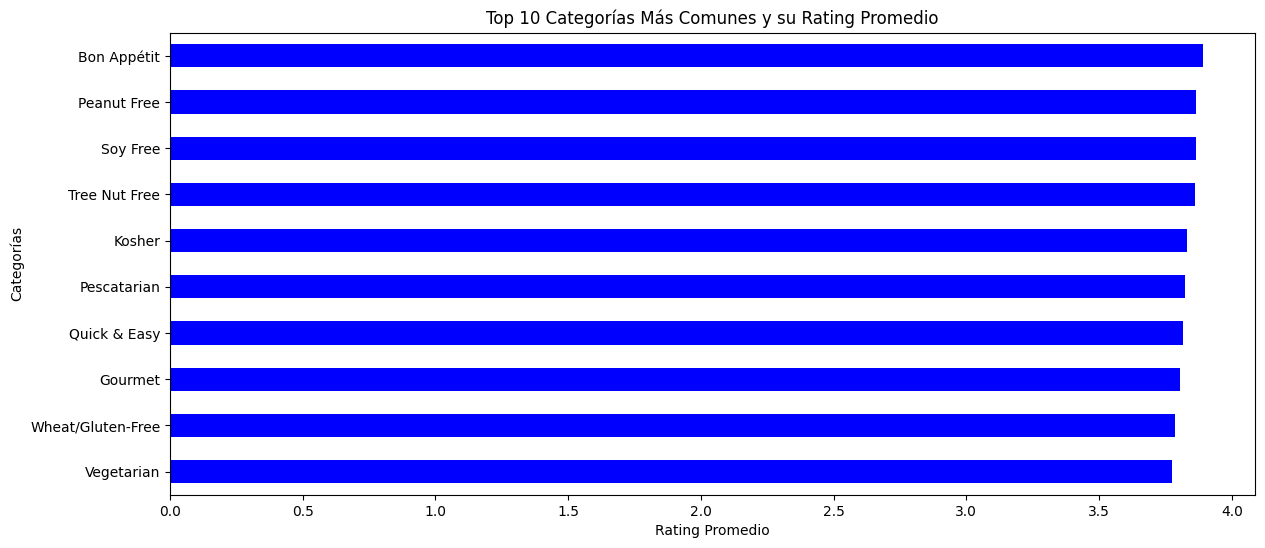

categories
Bon Appétit          3.893038
Gourmet              3.804622
Kosher               3.833198
Peanut Free          3.866359
Pescatarian          3.824789
Quick & Easy         3.814687
Soy Free             3.866067
Tree Nut Free        3.862685
Vegetarian           3.776110
Wheat/Gluten-Free    3.785798
Name: rating, dtype: float64

In [8]:
# Explosión de las categorías para obtener una fila por categoría
df_exploded = df.explode('categories')

# Contar el número de reseñas por cada categoría
category_counts = df_exploded['categories'].value_counts()

# Seleccionar las 10 categorías más comunes
top_10_categories = category_counts.head(10).index

# Filtrar el dataframe para incluir solo las categorías más comunes
df_top_10_categories = df_exploded[df_exploded['categories'].isin(top_10_categories)]

# Calcular la media de ratings por cada una de las 10 categorías más comunes
category_ratings_top_10 = df_top_10_categories.groupby('categories')['rating'].mean()

# Mostrar las 10 categorías más comunes y sus ratings promedio
print("Top 10 categorías más comunes y su rating promedio:")


# Visualizar las 10 categorías más comunes con su rating promedio
plt.figure(figsize=(14, 6))
category_ratings_top_10.sort_values(ascending=True).plot(kind='barh', color='blue')
plt.title('Top 10 Categorías Más Comunes y su Rating Promedio')
plt.xlabel('Rating Promedio')
plt.ylabel('Categorías')
plt.show()
category_ratings_top_10


**Relacion de categorias y rating con al menos 20 reseñas (20 mejores y 20 peores)**

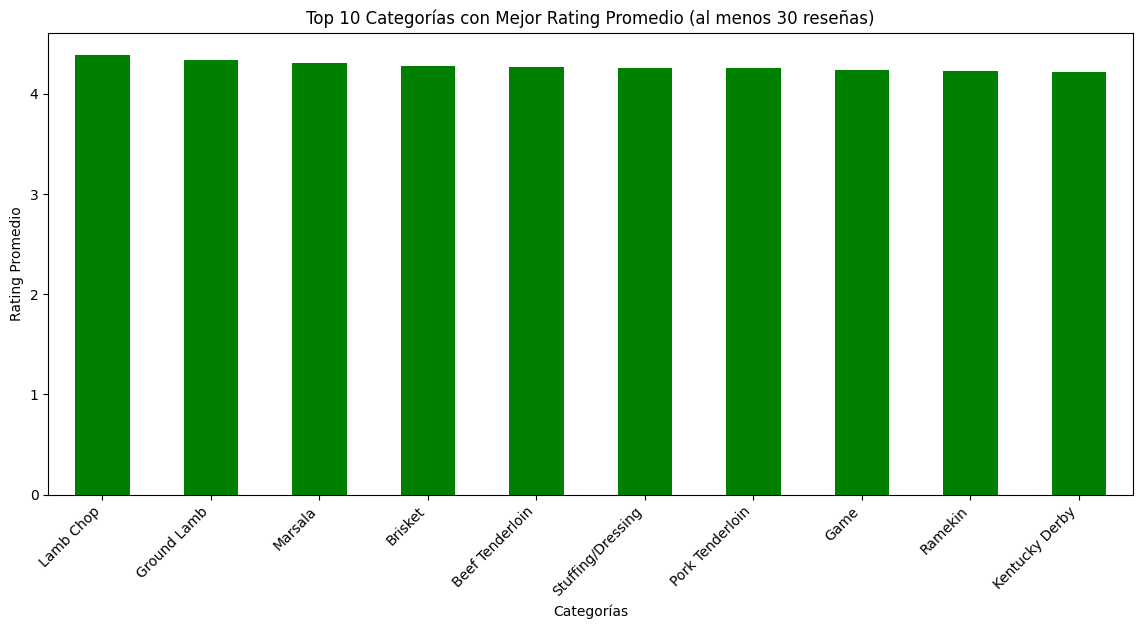

categories
Lamb Chop            4.388889
Ground Lamb          4.339286
Marsala              4.305556
Brisket              4.276316
Beef Tenderloin      4.262153
Stuffing/Dressing    4.257246
Pork Tenderloin      4.255208
Game                 4.236111
Ramekin              4.227941
Kentucky Derby       4.218750
Name: rating, dtype: float64

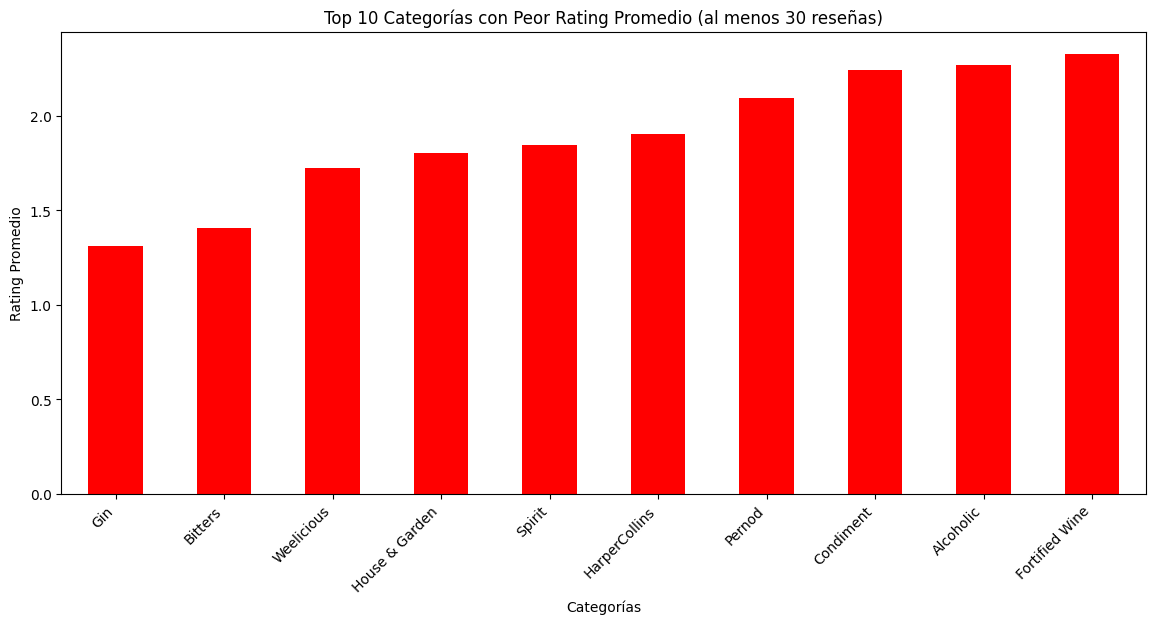

categories
Gin               1.310841
Bitters           1.407480
Weelicious        1.723485
House & Garden    1.805556
Spirit            1.843607
HarperCollins     1.905992
Pernod            2.094907
Condiment         2.239583
Alcoholic         2.268713
Fortified Wine    2.327303
Name: rating, dtype: float64

In [9]:
# Explosión de las categorías para obtener una fila por categoría
df_exploded = df.explode('categories')

# Contar el número de reseñas por cada categoría
category_counts = df_exploded['categories'].value_counts()

# Filtrar categorías que tienen al menos 20 reseñas
valid_categories = category_counts[category_counts >= 30].index

# Filtrar el dataframe para solo incluir las categorías válidas
df_valid_categories = df_exploded[df_exploded['categories'].isin(valid_categories)]

# Calcular la media de ratings por categoría
category_ratings = df_valid_categories.groupby('categories')['rating'].mean()

# Ordenar las categorías por rating promedio
category_ratings_sorted = category_ratings.sort_values(ascending=False)

# Visualizar el Top 10 de categorías con el rating más alto
plt.figure(figsize=(14, 6))
category_ratings_sorted.head(10).plot(kind='bar', color='green')
plt.title('Top 10 Categorías con Mejor Rating Promedio (al menos 30 reseñas)')
plt.xlabel('Categorías')
plt.ylabel('Rating Promedio')
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas para que no se superpongan
plt.show()

# Mostrar las 10 mejores categorías con rating más alto y al menos 20 reseñas
display(category_ratings_sorted.head(10))
print("\n\n")


#************Ahora para las peores con 10 reseñas al menos*************#

# Explosión de las categorías para obtener una fila por categoría
#df_exploded = df.explode('categories')
# Contar el número de reseñas por cada categoría
#category_counts = df_exploded['categories'].value_counts()
# Filtrar categorías que tienen al menos 20 reseñas
#valid_categories = category_counts[category_counts >= 10].index
# Filtrar el dataframe para solo incluir las categorías válidas
#df_valid_categories = df_exploded[df_exploded['categories'].isin(valid_categories)]
# Calcular la media de ratings por categoría
#category_ratings = df_valid_categories.groupby('categories')['rating'].mean()

# Ordenar las categorías por rating promedio
category_ratings_sorted = category_ratings.sort_values(ascending=True)

# Visualizar el Top 10 de categorías con el rating más bajo
plt.figure(figsize=(14, 6))
category_ratings_sorted.head(10).plot(kind='bar', color='red')
plt.title('Top 10 Categorías con Peor Rating Promedio (al menos 30 reseñas)')
plt.xlabel('Categorías')
plt.ylabel('Rating Promedio')
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas para que no se superpongan
plt.show()

# Mostrar las 10 mejores categorías con rating más alto y al menos 20 reseñas
category_ratings_sorted.head(10)

La conclusión es que los ratings suelen ser más bajos para recetas de sabores amargos o que estén relacionadas con alcohol ya que la peor es gin, la 9 peor es alcoholic y la 10 peor es vino fortificado.

# PASO 2: IMPLEMENTACIÓN PIPELINE

Implementación de un pipeline para el preprocesado de los textos. Para esta tarea puede usar las librerías habituales (NLTK, Gensim o SpaCy), o cualquier otra librería que considere oportuna. Tenga en cuenta que para trabajar con transformers el texto se pasa sin preprocesar.

In [10]:
# Asegurarse de que la columna 'desc' no tenga valores nulos o no textuales
desc_col = desc_col.dropna()  # Elimina valores nulos
desc_col = desc_col[desc_col.apply(lambda x: isinstance(x, str))]  # Mantener solo cadenas de texto

print(f"Filas válidas para tokenización: {len(desc_col)}")



Filas válidas para tokenización: 13484


## 1. WRANGLING Y TOKENIZATION

In [11]:
length = len(desc_col)
tokens_solution = []

#Este bucle itera cada elemento txt de desc_col
#Cada 100 iteraciones se ejecuta el bloque del if

for n, text in enumerate(desc_col):
    if not n%100:
        print('\rTokenizing data #', n, 'out of', length, end='', flush=True)
        #\r, el cursor vuelve al inicio de la linea
        #end, evita que se salte a una nueva linea con cada msj
        #flush, el mensaje se muestra en el mismo instante


    #Quitar extensiones HTML y XML
    text = BeautifulSoup(text, "lxml").get_text()

    #Quitar URLs
    text = re.sub(r'https://\S+|www\.\S+', '', text)

    #Expandir contracciones (I'm --> I am)
    text = fix(text)

    #Tokenizar(Hola que tal --> ['Hola', 'que', 'tal'])
    tokens = word_tokenize(text) #esto es una lista de palabras o caracteres (tokens) que ha seleccionado

    # creamos una lista de listas (añadiendo cada token)
    tokens_solution.append(tokens)


print('\n\n Los datos han sido tokenizados. Comprobando la información de la primera columna:')
print(desc_col.iloc[0])
print(tokens_solution[0])

Tokenizing data # 800 out of 13484 200 out of 13484 600 out of 13484 900 out of 13484 1000 out of 13484

C:\Users\javie\AppData\Local\Temp\ipykernel_29352\75779781.py:16: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "lxml").get_text()


Tokenizing data # 13300 out of 134841200 out of 13484 1400 out of 13484 1500 out of 13484 1700 out of 13484 1900 out of 13484 2000 out of 13484 2100 out of 13484 2200 out of 13484 2400 out of 13484 2600 out of 13484 2800 out of 13484 2900 out of 13484 3000 out of 13484 3100 out of 13484 3300 out of 13484 3500 out of 13484 3600 out of 13484 3800 out of 13484 4000 out of 13484 4100 out of 13484 4300 out of 13484 4400 out of 13484 4600 out of 13484 4800 out of 13484 4900 out of 13484 5000 out of 13484 5100 out of 13484 5300 out of 13484 5400 out of 13484 5600 out of 13484 5700 out of 13484 5800 out of 13484 5900 out of 13484 6000 out of 13484 6200 out of 13484 6300 out of 13484 6400 out of 13484 6500 out of 13484 6700 out of 13484 6900 out of 13484 7100 out of 13484 7200 out of 13484 7300 out of 13484 7400 out of 13484 7600 out of 13484 7700 out of 13484 7800 out of 13484 7900 out of 13484 8000 out of 13484 8100 out of 13484 8200 out of 13484 8300 out of 13484 8400 out of 13484 8500 out o

## 2. HOMOGENIZACIÓN

In [12]:
tokens_homogenizados = []

for text in tokens_solution:
    tokens_homogenizados.append([el.lower() for el in text if el.isalnum()])
    #el representa cada token de la lista de tokens del texto
    #Basicamente se pasa a minusculas y quita interrogantes y exclamaciones
print(tokens_homogenizados[0:30])

[['this', 'uses', 'the', 'same', 'ingredients', 'found', 'in', 'boudin', 'blanc', 'the', 'classic', 'french', 'white', 'sausage', 'start', 'two', 'days', 'before', 'serving'], ['the', 'tomato', 'sauce', 'has', 'tons', 'of', 'mediterranean', 'flavor', 'thanks', 'to', 'the', 'orange', 'peel', 'olives', 'and', 'oregano'], ['this', 'recipe', 'can', 'be', 'prepared', 'in', '45', 'minutes', 'or', 'less'], ['serve', 'this', 'newfangled', 'salad', 'with', 'a', 'crisp', 'flatbread', 'such', 'as', 'lavash', 'and', 'white', 'wine', 'or', 'rosé', 'spritzers'], ['pop', 'one', 'of', 'these', 'in', 'your', 'mouth', 'for', 'a', 'burst', 'of', 'bittersweet', 'flavor'], ['bulgogi'], ['transform', 'your', 'picnic', 'into', 'un', 'to', 'remember', 'with', 'this', 'elegant', 'arrangement', 'of', 'tangy', 'potato', 'salad', 'peas', 'gently', 'mashed', 'with', 'marjoram', 'and', 'salty', 'ham', 'softly', 'set', 'in', 'parsleyed', 'gelatin'], ['simmering', 'the', 'yams', 'fills', 'them', 'with', 'flavor', 'an

## 3. LEMMATIZED Y STEMMIZED

La lematización conserva mejor el significado, transforma las palabras a su forma base (lema). El stemmized corta el final de las palabras (contiene una lista de sufijos).

In [13]:
stemmer = SnowballStemmer('english')
lemmatizer = WordNetLemmatizer()

tokens_lemmatized = []
tokens_stemmed = []


for text in tokens_homogenizados:
    # Lematizar y stemizar cada token en paralelo
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in text]
    stemmed_tokens = [stemmer.stem(token) for token in text]

    # Agregar a las listas principales
    tokens_lemmatized.append(lemmatized_tokens)
    tokens_stemmed.append(stemmed_tokens)

# Mostrar ejemplos de resultados
print("\nEjemplo de tokens lematizados (Primera fila):")
print(tokens_lemmatized[0:30])

print("\nEjemplo de tokens stemizados (Primera fila):")
print(tokens_stemmed[0:30])


Ejemplo de tokens lematizados (Primera fila):
[['this', 'us', 'the', 'same', 'ingredient', 'found', 'in', 'boudin', 'blanc', 'the', 'classic', 'french', 'white', 'sausage', 'start', 'two', 'day', 'before', 'serving'], ['the', 'tomato', 'sauce', 'ha', 'ton', 'of', 'mediterranean', 'flavor', 'thanks', 'to', 'the', 'orange', 'peel', 'olive', 'and', 'oregano'], ['this', 'recipe', 'can', 'be', 'prepared', 'in', '45', 'minute', 'or', 'less'], ['serve', 'this', 'newfangled', 'salad', 'with', 'a', 'crisp', 'flatbread', 'such', 'a', 'lavash', 'and', 'white', 'wine', 'or', 'rosé', 'spritzer'], ['pop', 'one', 'of', 'these', 'in', 'your', 'mouth', 'for', 'a', 'burst', 'of', 'bittersweet', 'flavor'], ['bulgogi'], ['transform', 'your', 'picnic', 'into', 'un', 'to', 'remember', 'with', 'this', 'elegant', 'arrangement', 'of', 'tangy', 'potato', 'salad', 'pea', 'gently', 'mashed', 'with', 'marjoram', 'and', 'salty', 'ham', 'softly', 'set', 'in', 'parsleyed', 'gelatin'], ['simmering', 'the', 'yam', 'fi

### LIMPIEZA
En este apartado se quitan palabras que no son relevantes como artículos o pronmbres, para ello se utiliza stopwords. Se realizará una limpieza tanto para el conjunto de lematizacion como el de estematizacion

In [14]:
stopwords_en = stopwords.words('english')
tokens_lemmatized_limpios = []
tokens_stemmed_limpios = []

for lemmatized_tokens, stemmed_tokens in zip(tokens_lemmatized, tokens_stemmed):
    # Limpiar lematizados
    cleaned_lemmatized = [
        token for token in lemmatized_tokens
        if token not in stopwords_en and len(token) > 2
    ]
    tokens_lemmatized_limpios.append(cleaned_lemmatized)

    # Limpiar stemizados
    cleaned_stemmed = [
        token for token in stemmed_tokens
        if token not in stopwords_en and len(token) > 2
    ]
    tokens_stemmed_limpios.append(cleaned_stemmed)

# Mostrar ejemplos de resultados limpios
print("\nEjemplo de tokens lematizados y limpiados (Primera fila):")
print(tokens_lemmatized_limpios[0:30])

print("\nEjemplo de tokens stemizados y limpiados (Primera fila):")
print(tokens_stemmed_limpios[0:30])


Ejemplo de tokens lematizados y limpiados (Primera fila):
[['ingredient', 'found', 'boudin', 'blanc', 'classic', 'french', 'white', 'sausage', 'start', 'two', 'day', 'serving'], ['tomato', 'sauce', 'ton', 'mediterranean', 'flavor', 'thanks', 'orange', 'peel', 'olive', 'oregano'], ['recipe', 'prepared', 'minute', 'less'], ['serve', 'newfangled', 'salad', 'crisp', 'flatbread', 'lavash', 'white', 'wine', 'rosé', 'spritzer'], ['pop', 'one', 'mouth', 'burst', 'bittersweet', 'flavor'], ['bulgogi'], ['transform', 'picnic', 'remember', 'elegant', 'arrangement', 'tangy', 'potato', 'salad', 'pea', 'gently', 'mashed', 'marjoram', 'salty', 'ham', 'softly', 'set', 'parsleyed', 'gelatin'], ['simmering', 'yam', 'fill', 'flavor', 'yield', 'lovely', 'coating'], ['tony', 'tan', 'laksa', 'lemak'], ['cake', 'perfect', 'moist', 'forgiving', 'easy', 'jif', 'creamy', 'peanut', 'butter', 'favorite', 'decadent', 'frosting'], ['recipe', 'prepared', 'minute', 'less'], ['chutney', 'mustard', 'sauce', 'overlap', 

### **LO MISMO PARA DIRECTIONS**

In [15]:
directions_col = filtered_data['directions']
print(f"Filas válidas para tokenización: {len(directions_col)}")

lengthd = len(directions_col)
tokens_directions = []

for m, text in enumerate(directions_col):
    #Es necesario hacer una comprobacion de si es una lista porque puede dar error
    #ya que beautifulshop necesita un string como input
    if isinstance(text, list):
        text = ' '.join(text)

    # Quitar extensiones
    text = BeautifulSoup(text, "lxml").get_text()

    # Eliminar URLs
    text = re.sub(r'https://\S+|www\.\S+', '', text)

    #Contracciones
    text = fix(text)

    tokens = word_tokenize(text)

    tokens_directions.append(tokens)


print(tokens_directions[0:30])

tokens_homogenizados_directions = []

for text in tokens_directions:
    tokens_homogenizados_directions.append([el.lower() for el in text if el.isalnum()])
    #el representa cada token de la lista de tokens del texto
    #Basicamente se pasa a minusculas y quita interrogantes y exclamaciones
print(tokens_homogenizados_directions[0:30])

stemmer = SnowballStemmer('english')
lemmatizer = WordNetLemmatizer()

tokens_lemmatized_directions = []
tokens_stemmed_directions = []


for text in tokens_homogenizados_directions:
    # Lematizar y stemizar cada token en paralelo
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in text]
    stemmed_tokens = [stemmer.stem(token) for token in text]

    # Agregar a las listas principales
    tokens_lemmatized_directions.append(lemmatized_tokens)
    tokens_stemmed_directions.append(stemmed_tokens)

# Mostrar ejemplos de resultados
print("\nEjemplo de tokens lematizados (Primera fila):")
print(tokens_lemmatized_directions[0:30])

print("\nEjemplo de tokens stemizados (Primera fila):")
print(tokens_stemmed_directions[0:30])


stopwords_en = stopwords.words('english')
tokens_lemmatized_directions_limpios = []
tokens_stemmed_directions_limpios = []

for lemmatized_tokens, stemmed_tokens in zip(tokens_lemmatized_directions, tokens_stemmed_directions):
    # Limpiar lematizados
    cleaned_lemmatized = [
        token for token in lemmatized_tokens
        if token not in stopwords_en and len(token) > 2
    ]
    tokens_lemmatized_directions_limpios.append(cleaned_lemmatized)

    # Limpiar stemizados
    cleaned_stemmed = [
        token for token in stemmed_tokens
        if token not in stopwords_en and len(token) > 2
    ]
    tokens_stemmed_directions_limpios.append(cleaned_stemmed)

# Mostrar ejemplos de resultados limpios
print("\nEjemplo de tokens lematizados y limpiados (Primera fila):")
print(tokens_lemmatized_directions_limpios[0:30])

print("\nEjemplo de tokens stemizados y limpiados (Primera fila):")
print(tokens_stemmed_directions_limpios[0:30])


Filas válidas para tokenización: 20100


C:\Users\javie\AppData\Local\Temp\ipykernel_29352\655404691.py:14: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "lxml").get_text()


[['1', '.', 'Place', 'the', 'stock', ',', 'lentils', ',', 'celery', ',', 'carrot', ',', 'thyme', ',', 'and', 'salt', 'in', 'a', 'medium', 'saucepan', 'and', 'bring', 'to', 'a', 'boil', '.', 'Reduce', 'heat', 'to', 'low', 'and', 'simmer', 'until', 'the', 'lentils', 'are', 'tender', ',', 'about', '30', 'minutes', ',', 'depending', 'on', 'the', 'lentils', '.', '(', 'If', 'they', 'begin', 'to', 'dry', 'out', ',', 'add', 'water', 'as', 'needed', '.', ')', 'Remove', 'and', 'discard', 'the', 'thyme', '.', 'Drain', 'and', 'transfer', 'the', 'mixture', 'to', 'a', 'bowl', ';', 'let', 'cool', '.', '2', '.', 'Fold', 'in', 'the', 'tomato', ',', 'apple', ',', 'lemon', 'juice', ',', 'and', 'olive', 'oil', '.', 'Season', 'with', 'the', 'pepper', '.', '3', '.', 'To', 'assemble', 'a', 'wrap', ',', 'place', '1', 'lavash', 'sheet', 'on', 'a', 'clean', 'work', 'surface', '.', 'Spread', 'some', 'of', 'the', 'lentil', 'mixture', 'on', 'the', 'end', 'nearest', 'you', ',', 'leaving', 'a', '1-inch', 'border', '

# PASO 3: REPRESENTACIÓN VECTORIAL
Representación vectorial de los documentos mediante tres procedimientos
diferentes

Empezaremos por crear un diccionario que contenga todos los tokens conseguidos en las partes anteriores para almacenarlas en nuestro corpus lingüístico

In [16]:
from gensim.corpora import Dictionary

mycorpus = tokens_stemmed_directions_limpios
D = Dictionary(mycorpus)
n_tokens = len(D)

print('El diccionario contiene ', n_tokens, 'términos')
print('Los primeros 10 términos de mi diccionario:')
for n in range(10):
    print(str(n), ':', D[n])

El diccionario contiene  6763 términos
Los primeros 10 términos de mi diccionario:
0 : add
1 : appl
2 : assembl
3 : away
4 : befor
5 : begin
6 : boil
7 : border
8 : bottom
9 : bowl


Tras la creación de nuestro diccionario, lo pasaremos por un filtro para eliminar aquellos términos con una baja o muy alta frecuencia de aparición, para así mejorar la calidad de nuesttro diccionario. Para ello utilizaremos la función "filter_extremes" añadiendo los parámetros "no_below" y "no_above"

In [17]:
no_below = 4 #Eliminamos las palabras que aparecen en menos de 4 documentos
no_above = .80 #Eliminamos las palabras con una tasa de aparición por encima del 80% de los documentos.

D.filter_extremes(no_below=no_below,no_above=no_above, keep_n=55000)
n_tokens = len(D)

print('El diccionario contiene ', n_tokens, 'términos')
print('Los primeros 10 términos de mi diccionario:')
for n in range(10):
    print(str(n), ':', D[n])

print('Number of documents processed:', D.num_docs)
print('Number of elements in dictionary:', n_tokens)

El diccionario contiene  3259 términos
Los primeros 10 términos de mi diccionario:
0 : add
1 : appl
2 : assembl
3 : away
4 : befor
5 : begin
6 : boil
7 : border
8 : bottom
9 : bowl
Number of documents processed: 20100
Number of elements in dictionary: 3259


Como podemos ver, el número de términos obtenidos tras pasar nuestro diccionario por el filtro ha descendido a un total de 3591 de los 11136 que habia anteriormente. Tras esto, pasaremos a crear una versión numnérica mediante la función "doc2bow"

In [18]:
# Transformar los documentos a representaciones BoW
mycorpus_bow = [D.doc2bow(doc) for doc in mycorpus]

n_project = 1000
print(colored('============= Project abstract (lemmas) =============', 'blue'))
print(' '.join(mycorpus[n_project]))

print(colored('\n============= Sparse vector representation =============', 'blue'))
print(mycorpus_bow[n_project])

print(colored('\n============= Word counts for the project =============', 'blue'))
print(list(map(lambda x: (D[x[0]], x[1]), mycorpus_bow[n_project])))

============= Project abstract (lemmas) =============
larg heavi skillet cook bacon moder heat stir crisp transfer paper towel drain chop fine bowl stir togeth bacon mayonnais mustard spread bacon mayonnais one side bread slice sandwich tomato slice cut sandwich triangl

============= Sparse vector representation =============
[(9, 1), (19, 1), (23, 1), (51, 1), (53, 2), (54, 1), (59, 1), (62, 1), (74, 1), (81, 1), (94, 1), (100, 1), (133, 1), (140, 2), (158, 1), (204, 3), (206, 1), (207, 1), (208, 1), (209, 1), (211, 2), (212, 1), (214, 2), (216, 1), (239, 1), (277, 1), (360, 1), (801, 1)]

============= Word counts for the project =============
[('bowl', 1), ('drain', 1), ('heat', 1), ('side', 1), ('slice', 2), ('spread', 1), ('tomato', 1), ('transfer', 1), ('bread', 1), ('cook', 1), ('heavi', 1), ('larg', 1), ('skillet', 1), ('stir', 2), ('moder', 1), ('bacon', 3), ('chop', 1), ('crisp', 1), ('cut', 1), ('fine', 1), ('mayonnais', 2), ('paper', 1), ('sandwich', 2), ('towel', 1), ('to

## FRECUENCIA DE LAS TOKKENS

In [19]:
# ------------------------- FRECUENCIA TOKENS ----------------------------------
# corpus con la lista de todas las tuplas
mycorpus_bow_flat = [item for sublist in mycorpus_bow for item in sublist]

# array para contar tokens.
# token_count[n] = numero de ocurrenciass del n-th token, D[n]
token_count = np.zeros(n_tokens)

for x in mycorpus_bow_flat:
    token_count[x[0]] += x[1] #numero de ocurrencias de cada token

# ordenamos en orden decreciente
ids_sorted = np.argsort(- token_count)
tf_sorted = token_count[ids_sorted]

In [20]:
# Término más frecuente y su frecuencia
print("\nThe most frequent word in our corpus is",D[ids_sorted[0]])
print("{0} times in the whole corpus".format(tf_sorted[0]))
# Término menos frecuente y su frecuencia
print("\nThe less frequent word in our corpus is", D[ids_sorted[len(ids_sorted)-1]])
print("which appears {0} times in the whole corpus".format(tf_sorted[len(ids_sorted)-1]))


The most frequent word in our corpus is heat
32651.0 times in the whole corpus

The less frequent word in our corpus is freeli
which appears 4.0 times in the whole corpus


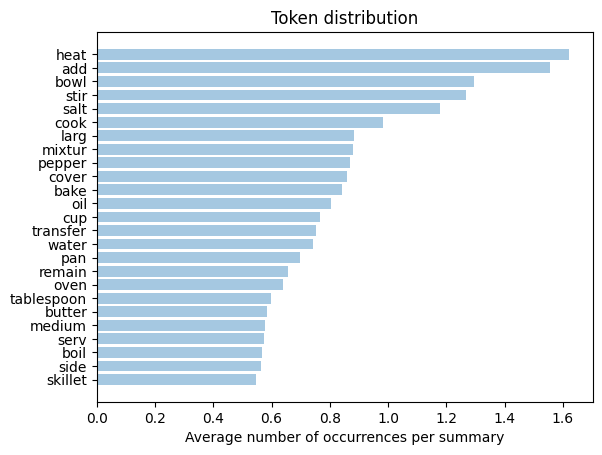

In [21]:
#-------------------- FRECUENCIA MEDIA APARICIÓN TOKENS ------------------------
plt.rcdefaults()

n_art = len(data)
n_bins = 25
hot_tokens = [D[i] for i in ids_sorted[n_bins-1::-1]]
y_pos = np.arange(len(hot_tokens))
z = tf_sorted[n_bins-1::-1]/n_art

plt.figure()
plt.barh(y_pos, z, align='center', alpha=0.4)
plt.yticks(y_pos, hot_tokens)
plt.xlabel('Average number of occurrences per summary')
plt.title('Token distribution')
plt.show()

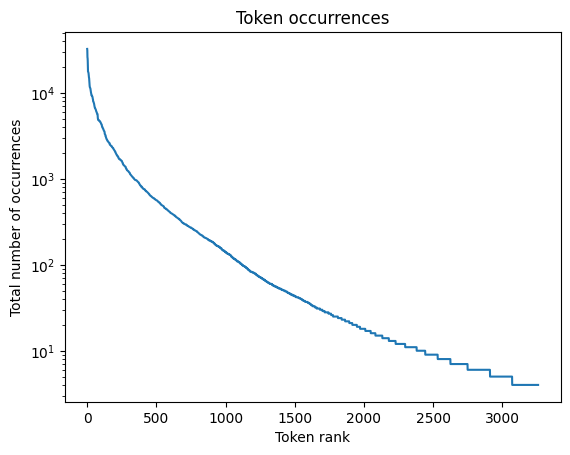

In [22]:
#---------- NUMERO TOKENS VS NUMERO TOTAL APARICIONES EN EL CORPUS -------------
plt.figure()
plt.semilogy(tf_sorted)
plt.ylabel('Total number of occurrences')
plt.xlabel('Token rank')
plt.title('Token occurrences')
plt.show()

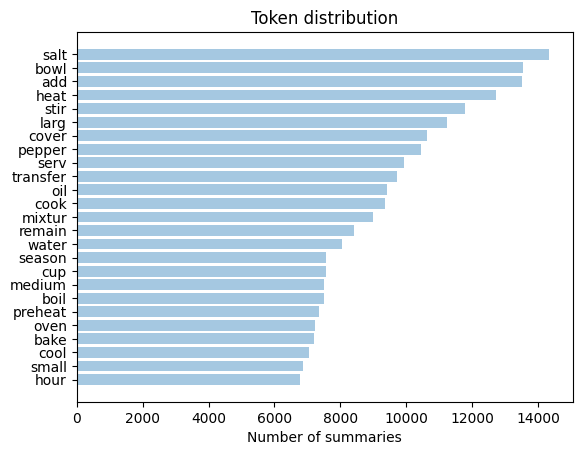

In [23]:
# ------ DIAGRAMA NUMERO DE SUMMARIES CON PALABRAS MAS RECURRIDAS --------------

token_count2 = np.zeros(n_tokens)
for x in mycorpus_bow_flat:
    token_count2[x[0]] += (x[1]>0) #numero de ocurrencias de cada token

# ordenamos de mayor a menos numero de ocurrencias
ids_sorted2 = np.argsort(- token_count2)
tf_sorted2 = token_count2[ids_sorted2]

#representamos
n_bins = 25
hot_tokens2 = [D[i] for i in ids_sorted2[n_bins-1::-1]]
y_pos2 = np.arange(len(hot_tokens2))
z2 = tf_sorted2[n_bins-1::-1]

plt.barh(y_pos2, z2, align='center', alpha=0.4)
plt.yticks(y_pos2, hot_tokens2)
plt.xlabel('Number of summaries')
plt.title('Token distribution')
plt.show()

## 3.1 TF-IDF

In [24]:
from gensim.models import TfidfModel

# Entrenamos modelo tfidf
tfidf = TfidfModel(mycorpus_bow)

tfidf_corpus = []
for doc in mycorpus_bow:
  tfidf_vector_tuple = tfidf[doc]
  tfidf_vector = []
  for vector in tfidf_vector_tuple:
    tfidf_vector.append(vector[1])
  tfidf_corpus.append(tfidf_vector)

# Mostramos el vector del primer documento
print("Representación de TFIDF del primer documento:")
print(tfidf_corpus[0])

Representación de TFIDF del primer documento:
[0.010230034215127, 0.08707506832137347, 0.11856905850707768, 0.10139290984174712, 0.04617786908120805, 0.057305529405649085, 0.025460551360345633, 0.10698776139376864, 0.05047499587712059, 0.010169040066630313, 0.030967180632580662, 0.0717301864247427, 0.07599548004079107, 0.04830793758105681, 0.06641918670212243, 0.02705496179677941, 0.07776346039942389, 0.11446480462945996, 0.04932961187870708, 0.04000696338857194, 0.04393404614348159, 0.07606881714046755, 0.12394879866864957, 0.011805748572767614, 0.031228527416640593, 0.3979378316247156, 0.05300059076931418, 0.1250354271085411, 0.04554767716602774, 0.6742615679588638, 0.029033710747574076, 0.20714554761009238, 0.050896045045497884, 0.02539520697907683, 0.04144704261505184, 0.15421201281593552, 0.08043268390671067, 0.019568958352052482, 0.05985245747687625, 0.016865479706637657, 0.06507141123859518, 0.03773766584368224, 0.02983708880843427, 0.11557237461308799, 0.12851123177610924, 0.00

In [25]:
max_len = max(len(vector) for vector in tfidf_corpus)
tfidf_corpus_igual = [vector + [0] * (max_len - len(vector)) for vector in tfidf_corpus]

## 3.2 Word2Vec

In [26]:
from gensim.models import Word2Vec

# Entrenamos modelo Word2Vec
word2vec = Word2Vec(sentences=mycorpus, vector_size=100, window=5, min_count=1, workers=4)

# Obtenemos la representación de un documento como promedio de sus vectores de palabras
document_vectors = []
for doc in mycorpus:
    vectors = [word2vec.wv[word] for word in doc if word in word2vec.wv]
    if vectors:
        avg_vector = np.mean(vectors, axis=0)
        document_vectors.append(avg_vector)
    else:
        document_vectors.append(np.zeros(word2vec.vector_size))

# Mostramos el vector del primer documento
print("Representación de Word2Vec del primer documento:")
print(document_vectors[0])

Representación de Word2Vec del primer documento:
[-0.236881   -0.07430373 -0.22514068 -0.13661532 -0.10297354  0.15008588
 -0.03833194 -0.23557805  0.1539206   0.05685176 -0.2707228  -0.39796862
  0.07430048  0.22021231 -0.17363442  0.34007794 -0.10423097 -0.09314034
 -0.11615394  0.250445    0.09782188 -0.35914898  0.08772263  0.09211006
  0.02473877 -0.13943818  0.00996114  0.42293745  0.08840089 -0.04771736
  0.01262883  0.06960332 -0.30664653 -0.39138538  0.01723682 -0.4009624
  0.21344136 -0.11574519 -0.06787214  0.18209831 -0.09766874 -0.5536202
  0.20792824  0.1582026  -0.3289984  -0.27574977  0.26297036  0.30418763
  0.15150017 -0.01193821  0.22145128  0.3149798   0.26887992 -0.00590676
  0.45616025  0.06564713  0.12760831 -0.25511867  0.10793495  0.2608464
 -0.18570553 -0.34833986  0.4426288   0.19958133 -0.5031842  -0.14302292
 -0.17944029  0.49551585  0.2894921  -0.01349919  0.04174655 -0.52017605
  0.03815724 -0.22984828  0.00981641 -0.05117497  0.05881681  0.08880003
  0.1

## 3.3 Embeddings contextuales - BERT

In [29]:
from transformers import BertTokenizer, BertModel

# Creamos el modelo
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased', output_hidden_states = True)
model.eval()
bert = []

KeyboardInterrupt: 

In [ ]:
# # Procesamos cada frase de forma individual

# for n, doc in enumerate(corpus):
#     print('\r Bert #', n, 'out of', length, end='', flush=True)

#     # Añadimos el inicio y final de frase
#     marked_text = "[CLS] " + ' '.join(doc) + " [SEP]"
#     # Convertimos la frase a tokens
#     tokenized_text = tokenizer.tokenize(marked_text)
#     indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)
#     # Solo es una frase, asociamos todo a 1
#     segments_ids = [1] * len(tokenized_text)

#     tokens_tensor = torch.tensor([indexed_tokens])
#     segments_tensors = torch.tensor([segments_ids])

#     with torch.no_grad():
#         outputs = model(tokens_tensor, segments_tensors)
#     hidden_states = outputs[2]
#     # Queremos un vector por frase asi que hacemos la media de los vectores
#     token_vecs = hidden_states[-2][0]
#     sentence_embedding = torch.mean(token_vecs, dim=0)
#     bert.append(sentence_embedding)

# # Mostramos el vector del primer documento
# print("Representación de Bert del primer documento:")
# print(bert[0])

# PASO 4: ENTRENAMIENTO Y EVALUACIÓN DE MODELOS


Empezaremos por crear los sets de datos de entrenamiento y validación

In [31]:

filtered_data = data.dropna(subset=['directions', 'rating'])

In [32]:
from sklearn.model_selection import train_test_split

#Sets de datos para TF-IDF
X_tfidf = np.array(tfidf_corpus_igual)
y_tfidf = np.array(filtered_data['rating'])

X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_tfidf, y_tfidf, test_size=0.2, random_state=42)

#Sets de datos para Word2Vec
X_word2vec = np.array(document_vectors)
y_word2vec = np.array(filtered_data['rating'])

X_train_word2vec, X_test_word2vec, y_train_word2vec, y_test_word2vec = train_test_split(X_word2vec, y_word2vec, test_size=0.2, random_state=42)

Una vez creados todos los sets, pasaremos a realizar las redes neuronales y

## 4.1 Redes neuronales 


### 4.1.1 TF-IDF

In [33]:
import torch.nn as nn
import torch.optim as optim

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        hidden_size_2 = hidden_size // 2
        super(RNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size_2)
        self.relu = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size_2, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x

# Configuración del modelo
input_size = X_train_tfidf.shape[1]  # Dimensión de entrada igual al número de características TF-IDF
hidden_size = 128  # Número de neuronas en la capa oculta
output_size = 1  # Número de clases

model = RNN(input_size, hidden_size, output_size)

In [34]:
#Configuración del optimizador y la función de pérdidas
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0005)

In [35]:
epochs = 1000

loss_train = np.zeros(epochs)
loss_test = np.zeros(epochs)

X_train_tensor = torch.tensor(X_train_tfidf, dtype=torch.float32, requires_grad=True)
y_train_tensor = torch.tensor(y_train_tfidf, dtype=torch.float32).squeeze(-1)
X_test_tensor = torch.tensor(X_test_tfidf, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_tfidf, dtype=torch.float32).squeeze(-1)

def train_model(model, criterion, optimizer, X_train, y_train, X_test, y_test, epochs):
    test_losses = []
    for epoch in range(epochs):
        outputs = model(X_train)
        outputs = outputs.squeeze(-1)
        loss = criterion(outputs, y_train)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        loss_train[epoch] = loss.item()

        with torch.no_grad():
            y_pred = model(X_test)
            test_loss = criterion(y_pred, y_test)
            loss_test[epoch] = test_loss.item()

train_model(model, criterion, optimizer, X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor, epochs)

c:\Users\javie\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\nn\modules\loss.py:608: UserWarning: Using a target size (torch.Size([4020])) that is different to the input size (torch.Size([4020, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


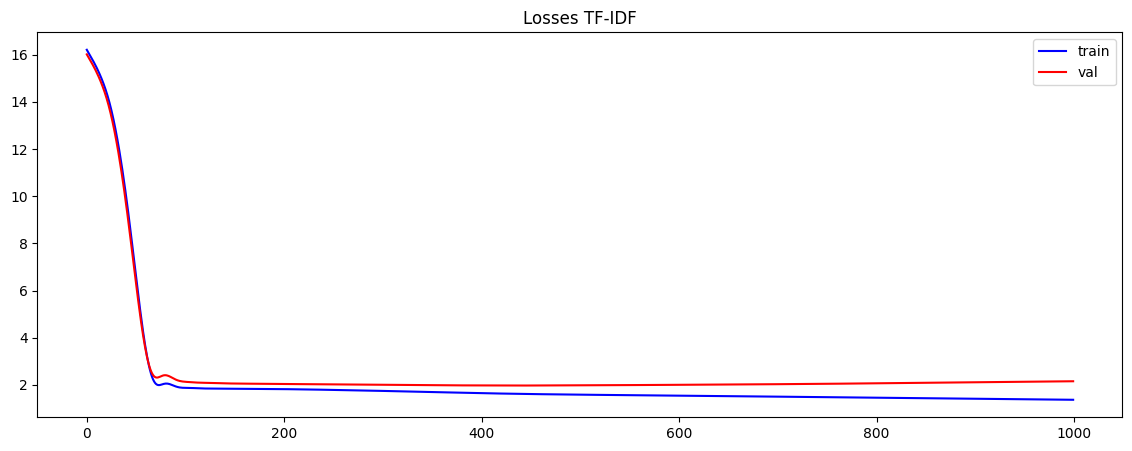

In [36]:
plt.figure(figsize=(14,5))
plt.plot(loss_train, 'b'), plt.plot(loss_test, 'r'), plt.legend(['train', 'val']), plt.title('Losses TF-IDF')
plt.show()

### 4.1.2 DOC2VEC

In [37]:
import torch.nn as nn
import torch.optim as optim
# 2. Definir la arquitectura de la red neuronal, la cual funcionará como regresor
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        hidden_size_2 = hidden_size // 2
        super(RNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size_2)
        self.relu = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size_2, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x

# Configuración del modelo
input_size = X_train_word2vec.shape[1]  # Dimensión de entrada igual al número de características TF-IDF
hidden_size = 128  # Número de neuronas en la capa oculta
output_size = 1  # Número de clases

model = RNN(input_size, hidden_size, output_size)

In [38]:
# 3. Configurar el optimizador y la función de pérdida
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0005)

In [39]:
# 4. Entrenar el modelo
epochs = 1000

loss_train = np.zeros(epochs)
loss_test = np.zeros(epochs)

X_train_tensor = torch.tensor(X_train_word2vec, dtype=torch.float32, requires_grad=True)
y_train_tensor = torch.tensor(y_train_word2vec, dtype=torch.float32).squeeze(-1)
X_test_tensor = torch.tensor(X_test_word2vec, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_word2vec, dtype=torch.float32).squeeze(-1)

def train_model(model, criterion, optimizer, X_train, y_train, X_test, y_test, epochs):
    test_losses = []
    for epoch in range(epochs):
        outputs = model(X_train)
        outputs = outputs.squeeze(-1)
        loss = criterion(outputs, y_train)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        loss_train[epoch] = loss.item()

        with torch.no_grad():
            y_pred = model(X_test)
            test_loss = criterion(y_pred, y_test)
            loss_test[epoch] = test_loss.item()

        # with torch.no_grad():
        #     test_outputs = model(X_test)
        #     test_loss = criterion(test_outputs, y_test).item()
        # test_losses.append(test_loss)

    return test_losses

# Entrenar
loss_test1 = train_model(model, criterion, optimizer, X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor, epochs)

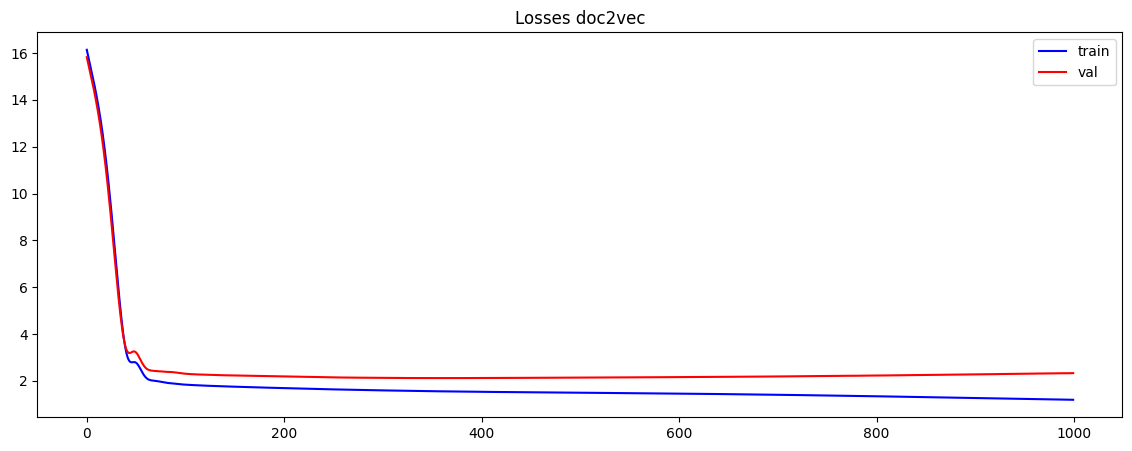

In [40]:
plt.figure(figsize=(14,5))
plt.plot(loss_train, 'b'), plt.plot(loss_test, 'r'), plt.legend(['train', 'val']), plt.title('Losses doc2vec')
plt.show()

### 4.1.3 BERT

## 4.2 Regresor K-NN

In [41]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

### 4.2.1 TF-IDF

In [42]:
modelo = KNeighborsRegressor(n_neighbors=1)
modelo.fit(X_train_tfidf, y_train_tfidf)

y_pred_train = modelo.predict(X_train_tfidf)
y_pred_test = modelo.predict(X_test_tfidf)

loss_train = mean_squared_error(y_train_tfidf, y_pred_train)
loss_test = mean_squared_error(y_test_tfidf, y_pred_test)

print(f"Pérdidas en el conjunto de entrenamiento: {loss_train:.4f}")
print(f"Pérdidas en el conjunto de validación: {loss_test:.4f}")

Pérdidas en el conjunto de entrenamiento: 0.0407
Pérdidas en el conjunto de validación: 2.9086


### 4.2.2 Doc2Vec

In [43]:
modelo = KNeighborsRegressor(n_neighbors=1)
modelo.fit(X_train_word2vec, y_train_word2vec)

y_pred_train = modelo.predict(X_train_word2vec)
y_pred_test = modelo.predict(X_test_word2vec)

loss_train = mean_squared_error(y_train_word2vec, y_pred_train)
loss_test = mean_squared_error(y_test_word2vec, y_pred_test)

print(f"Pérdidas en el conjunto de entrenamiento: {loss_train:.4f}")
print(f"Pérdidas en el conjunto de validación: {loss_test:.4f}")

Pérdidas en el conjunto de entrenamiento: 0.0407
Pérdidas en el conjunto de validación: 2.3037


### 4.2.3 BERT